# UC Irvine - Energy Efficiency EDA

This dataset contain measurements of building characteristics and their corresponding heating and cooling loads. Understanding these relationships is critical for designing energy-efficient buildings, reducing costs, and minimizing environmental impact.

Data is sourced from UC Irvine Machine Learning Repository.

---

### Import data and setup packages

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display
import numpy as np

""" COPIED FROM UC IRVINE TO FETCH DATA """
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# Data 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# Metadata 
display(energy_efficiency.metadata) 

{'uci_id': 242,
 'name': 'Energy Efficiency',
 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency',
 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv',
 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.',
 'area': 'Computer Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 768,
 'num_features': 8,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Y1', 'Y2'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Mon Feb 26 2024',
 'dataset_doi': '10.24432/C51307',
 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'],
 'intro_paper': {'ID': 379,
  'type': 'NATIVE',
  'title': 'Accurate quantitative estimation of energy performance of residential buildings us

---

### Dataset Overview

In [5]:
# Join X and y data to give us the ability to find the relationships between X and y.
df = pd.concat([X, y], axis = 1)
print(df.shape)
df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# Info on the data: missing values, and data types.
print("Check info and missing values: ")
df.info()
print("Second confirmation on null values: ")
df.isnull().sum()

Check info and missing values: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
Second confirmation on null values: 


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Since there are no null values, its safe to say that no nulls are to be cleaned.

---

### Data Cleaning / Preprocessing

In [5]:
# Variable information check for so I can rename it here. Also, another confirmation here that there are no missing values.
# Noting that since the variable names in the data are Xn and Yn as follows, this may cause confusion down the line so I'm using the descriptions as the column names.
display(energy_efficiency.variables) 

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


Given that we have descriptions here, let use these as the column names to ensure readability.

In [10]:
# Rename features using variables' descriptions for ease of use and better context.
rename_map = dict(zip(
    energy_efficiency.variables['name'],
    [name.replace(" ", "_") for name in energy_efficiency.variables['description']]
))
df_renamed = df.rename(columns=rename_map)
df_renamed

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61




---

### Descriptive Statistics

In [11]:
# Summary statistics of the data
df_renamed.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


From the summary statistics, we can observe that both the Heating Load and Cooling Load are right-skewed. Their means are much closer to the minimum than to the maximum, suggesting most buildings have relatively low loads with a few having much higher loads. This indicates clustering toward lower values and a long tail toward higher values. However, not all features behave this way as some are uniformly distributed or discrete by design. It would be best to see the relationships of each feature to the each of the target to know which drives the clustering of loads to the lower values.

---

In [41]:
# Grouped Summaries
no_load = [x for x in df_renamed if x not in ['Heating_Load', 'Cooling_Load']]
for i in no_load:
    print(f"Grouping by {i}")
    display(df_renamed.groupby(i)[['Heating_Load', 'Cooling_Load']].agg(['min', 'mean','max']))

Grouping by Relative_Compactness


Heating_Load                   Cooling_Load             \
                              min       mean    max          min       mean   
Relative_Compactness                                                          
0.62                         8.45  14.283281  17.26        12.04  15.244063   
0.64                        10.54  16.615313  19.52        16.67  20.227187   
0.66                         7.10  12.816719  15.34        12.14  15.869844   
0.69                         6.77  12.388906  14.75        11.73  15.242188   
0.71                         6.37  12.040156  14.71        11.27  15.035469   
0.74                         6.01  11.886719  14.61        10.90  14.809844   
0.76                        23.93  35.664219  40.78        29.40  36.407187   
0.79                        28.52  38.607969  43.10        30.93  40.239375   
0.82                        15.98  25.555312  30.00        21.16  28.028125   
0.86                        18.31  28.552656  32.75        21.97  30.912031   
0.90                        19.68  31.628906  37.24        25.16  33.820781   
0.98                        15.55  27.646250  32.85        21.33  29.217031   

                             
                        max  
Relative_Compactness         
0.62                  17.38  
0.64                  22.73  
0.66                  18.36  
0.69                  17.39  
0.71                  17.74  
0.74                  17.32  
0.76                  40.85  
0.79                  48.03  
0.82                  33.84  
0.86                  36.86  
0.90                  40.99  
0.98                  34.01

Grouping by Surface_Area


Heating_Load                   Cooling_Load                  
                      min       mean    max          min       mean    max
Surface_Area                                                              
514.5               15.55  27.646250  32.85        21.33  29.217031  34.01
563.5               19.68  31.628906  37.24        25.16  33.820781  40.99
588.0               18.31  28.552656  32.75        21.97  30.912031  36.86
612.5               15.98  25.555312  30.00        21.16  28.028125  33.84
637.0               28.52  38.607969  43.10        30.93  40.239375  48.03
661.5               23.93  35.664219  40.78        29.40  36.407187  40.85
686.0                6.01  11.886719  14.61        10.90  14.809844  17.32
710.5                6.37  12.040156  14.71        11.27  15.035469  17.74
735.0                6.77  12.388906  14.75        11.73  15.242188  17.39
759.5                7.10  12.816719  15.34        12.14  15.869844  18.36
784.0               10.54  16.615313  19.52        16.67  20.227187  22.73
808.5                8.45  14.283281  17.26        12.04  15.244063  17.38

Grouping by Wall_Area


Heating_Load                   Cooling_Load                  
                   min       mean    max          min       mean    max
Wall_Area                                                              
245.0             6.01  11.886719  14.61        10.90  14.809844  17.32
269.5             6.37  12.040156  14.71        11.27  15.035469  17.74
294.0             6.77  22.862604  32.85        11.73  25.123750  36.86
318.5             7.10  23.333646  37.24        12.14  25.906250  40.99
343.0            10.54  27.611641  43.10        16.67  30.233281  48.03
367.5             8.45  14.283281  17.26        12.04  15.244063  17.38
416.5            23.93  35.664219  40.78        29.40  36.407187  40.85

Grouping by Roof_Area


Heating_Load                   Cooling_Load                  
                   min       mean    max          min       mean    max
Roof_Area                                                              
110.25           15.55  27.646250  32.85        21.33  29.217031  34.01
122.50           19.68  33.646563  40.78        25.16  35.113984  40.99
147.00           15.98  30.905312  43.10        21.16  33.059844  48.03
220.50            6.01  13.338516  19.52        10.90  16.071432  22.73

Grouping by Overall_Height


Heating_Load                   Cooling_Load                  
                        min       mean    max          min       mean    max
Overall_Height                                                              
3.5                    6.01  13.338516  19.52        10.90  16.071432  22.73
7.0                   15.55  31.275885  43.10        21.16  33.104089  48.03

Grouping by Orientation


Heating_Load                   Cooling_Load                  
                     min       mean    max          min       mean    max
Orientation                                                              
2                   6.07  22.312865  42.77        10.90  24.604531  46.44
3                   6.05  22.380677  43.10        11.19  24.312552  47.59
4                   6.01  22.259896  42.74        10.94  24.480313  47.01
5                   6.04  22.275365  42.96        11.17  24.953646  48.03

Grouping by Glazing_Area


Heating_Load                   Cooling_Load                  
                      min       mean    max          min       mean    max
Glazing_Area                                                              
0.00                 6.01  14.286458  29.90        10.90  19.706250  39.44
0.10                10.07  20.357167  37.26        13.20  22.935542  43.33
0.25                11.64  22.756917  40.19        13.79  24.892625  45.97
0.40                12.42  25.411667  43.10        14.58  26.911417  48.03

Grouping by Glazing_Area_Distribution


Heating_Load                   Cooling_Load  \
                                   min       mean    max          min   
Glazing_Area_Distribution                                               
0                                 6.01  14.286458  29.90        10.90   
1                                10.36  23.026111  42.62        13.43   
2                                10.32  22.934444  43.10        13.20   
3                                10.34  22.681458  42.49        13.36   
4                                10.07  22.886667  42.96        13.20   
5                                10.34  22.680903  42.11        13.44   

                                             
                                mean    max  
Glazing_Area_Distribution                    
0                          19.706250  39.44  
1                          25.179514  46.94  
2                          24.996875  48.03  
3                          24.659444  46.44  
4                          25.015139  47.59  
5                          24.715000  47.01

We can see here that there is a lot of variation between the effects of the features to the target variables and we can assume here that the load increases both ways for heating and cooling given the data of each feature. This may indicate that while there might be a correlation between each target variable to each feature, there might be an underlying factor outside these features like the specific design specification for each building.

Overall height seems to be less varied compared to the other specs. I assume that the data here might affect the load as I believe that the overall height tends to have a higher strain on heating or cooling in terms of the concept of temperature as well volume.

This suggests that while the available features provide useful signals for prediction, they may not fully capture building performance. Future models might benefit from additional variables like insulation, building age, or regional climate.

---

### Univariate Analysis

##### Distributions

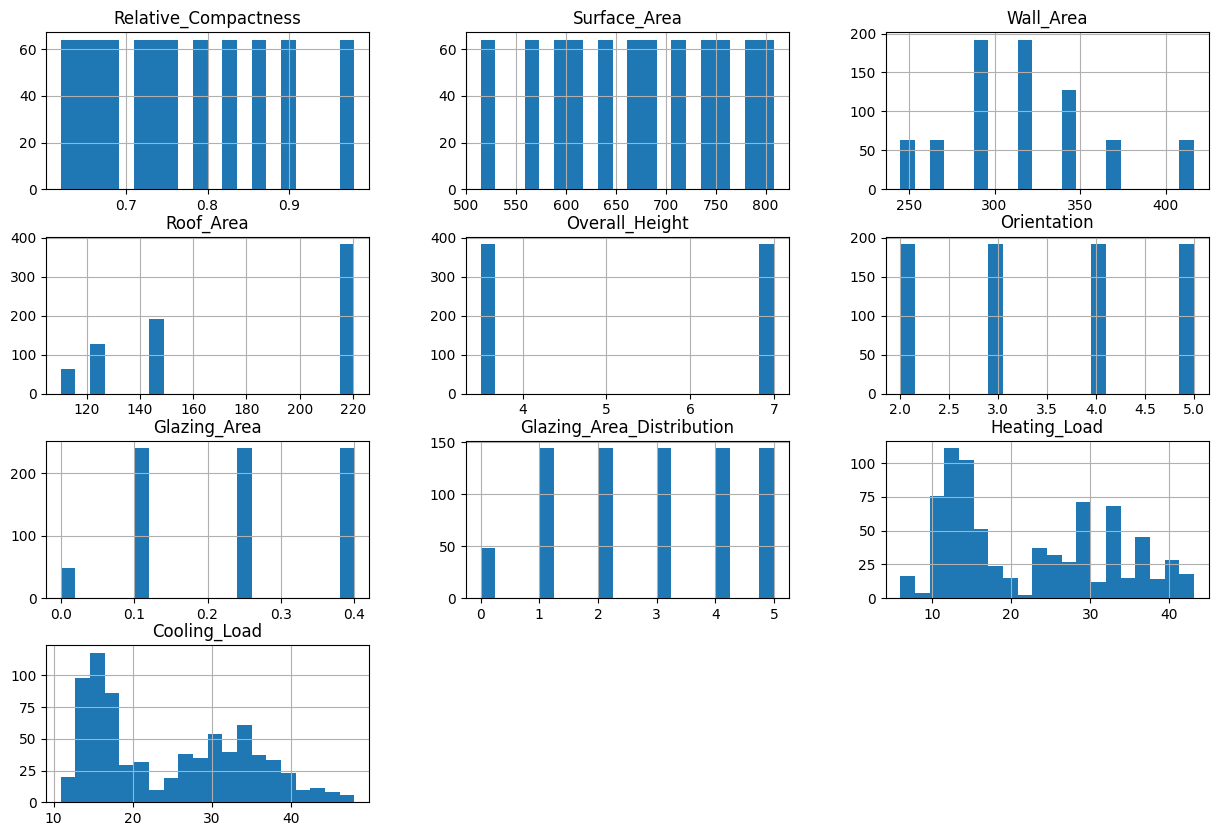

In [67]:
# Show the distributions of each feature
df_renamed.hist(bins = 20, figsize = (15,10))
plt.show()

Histogram Findings:
1. The histograms show right-skewed distributions for both Heating Load and Cooling Load. Most buildings in the sample have low heating/cooling requirements, with fewer buildings requiring much higher loads.

2. I am assuming here that Heating Load and Cooling Load might be positively correlated, which is logical since factors such as building compactness, glazing area, and insulation (even though not explicitly in the dataset) influence both loads in similar ways.

---

##### Boxplots for outlier checking

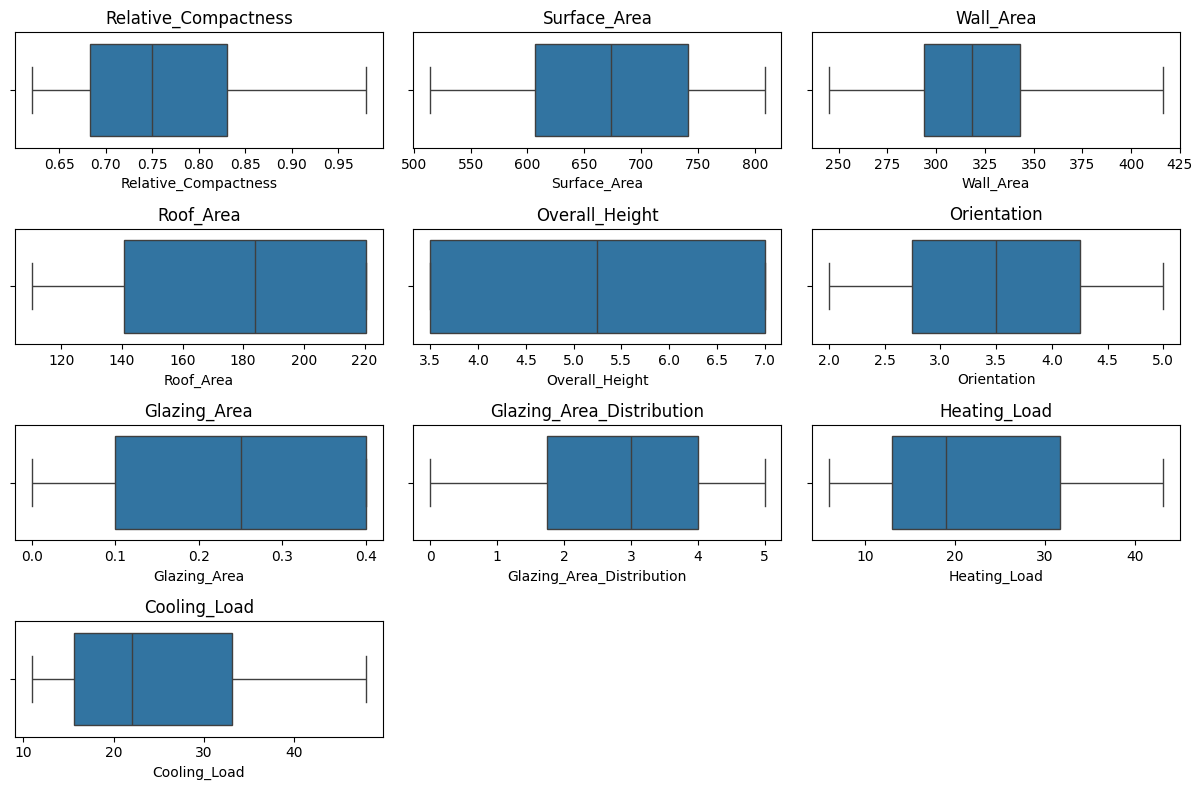

In [38]:
ncols = 3
nrows = int(np.ceil(len(df_renamed.columns) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(df_renamed.columns):
    sns.boxplot(x=df_renamed[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(len(df_renamed.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

No outliers found for any of the variables. Probably because these are generated? idk


---

### Bivariate Analysis

##### Relationship Checking

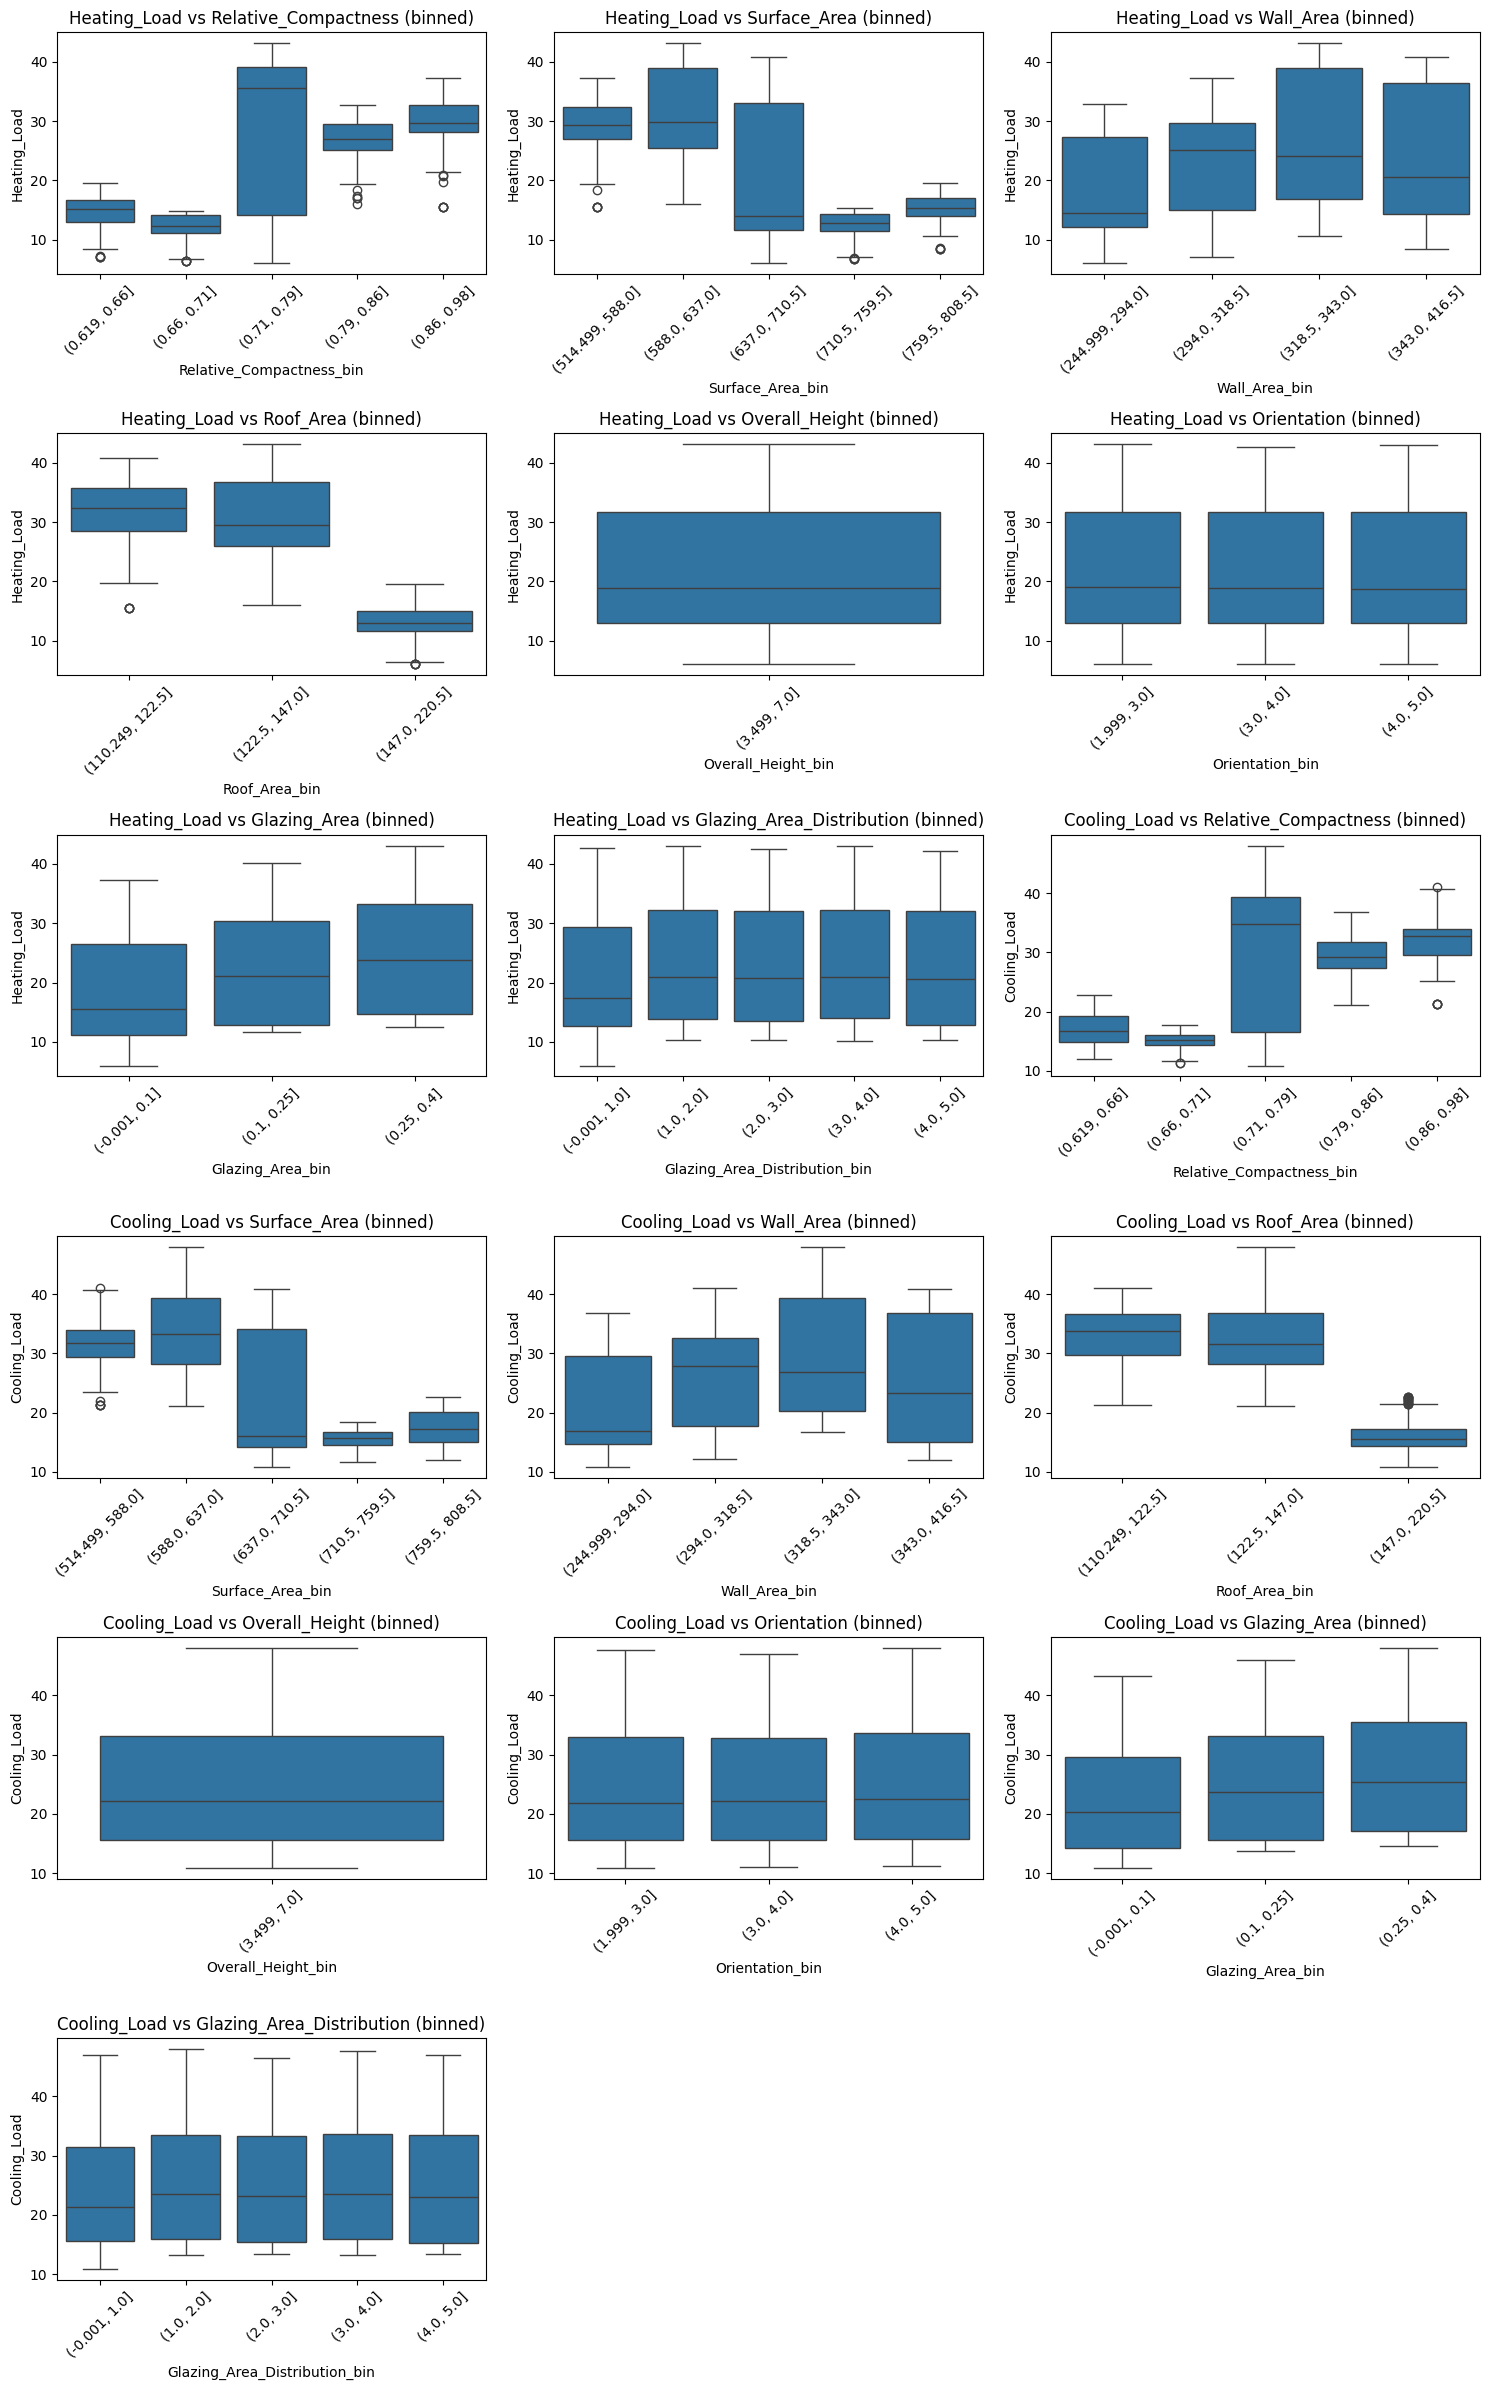

In [39]:
# Check non-linear relationships vs two types of load
df_binned = df_renamed.copy()
for x in no_load:
    df_binned[x + "_bin"] = pd.qcut(df_binned[x], q=5, duplicates="drop")

n_plots = len(no_load) * 2
ncols = 3
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

plot_idx = 0
for target in ['Heating_Load', 'Cooling_Load']:
    for x in no_load:
        sns.boxplot(
            x=df_binned[x + "_bin"], 
            y=df_binned[target], 
            ax=axes[plot_idx]
        )
        axes[plot_idx].set_title(f"{target} vs {x} (binned)")
        axes[plot_idx].tick_params(axis='x', rotation=45)
        plot_idx += 1

for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


Relative Compactness and Surface Area are both the strongest and most non-linear drivers of both heating and cooling loads. Roof Area to can shows the same trend. We can also see that load is less if relative compactness is less and increases as the other increases. Meanwhile for surface area, the load is greater if the surface area is smaller.

This does not make sense as architecturally, more compact buildings tend to lose less heat and larger surface areas allow for more heat transfer thus load is expected to increase. 

I'm assuming that there might be other features that caused this, it would be best to see the correlations here as it could be that the other features are causing distortions here probably due to building design specifications.



##### Correlations

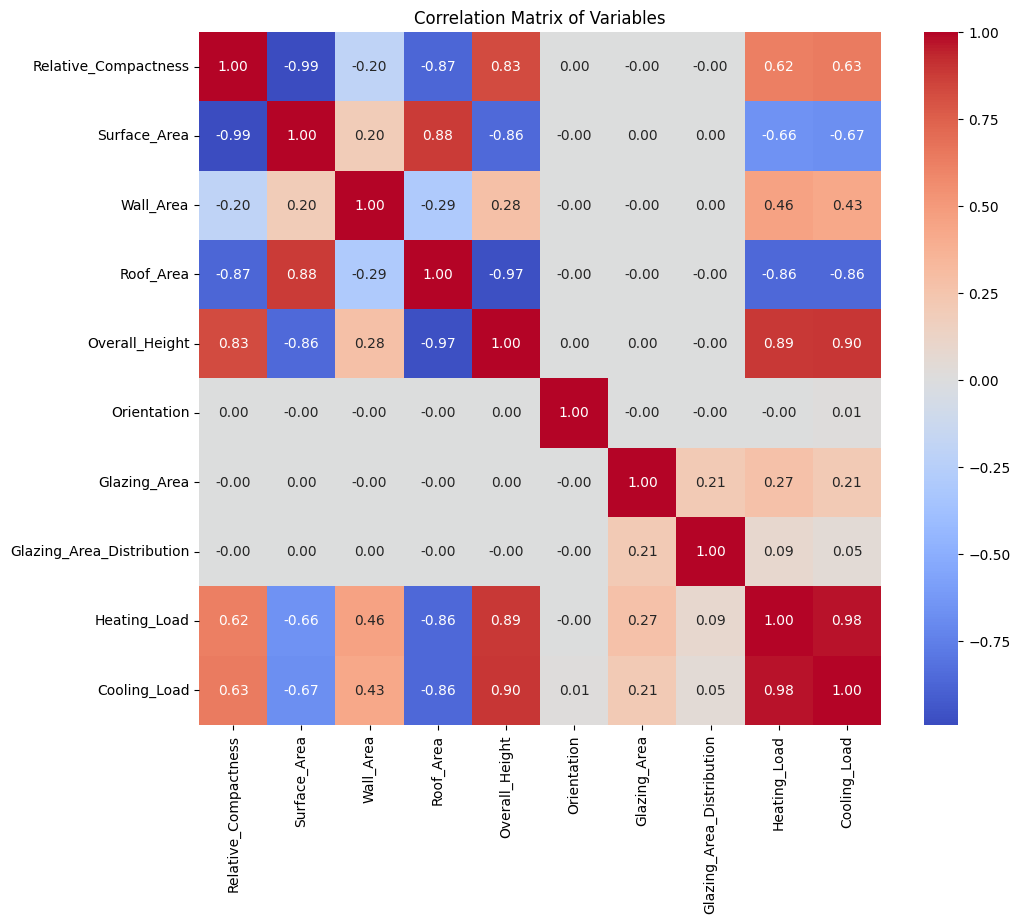

In [29]:
# Correlation Heatmap to show the relationship between the features and target variables.
plt.figure(figsize = (11,9))
sns.heatmap(df_renamed.corr(),
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f'
            )
plt.title('Correlation Matrix of Variables')
plt.show()

Correlation Findings:
1. The highest positive correlation for both Heating Load and Cooling Load is with Overall Height (0.89-0.9), which makes sense since taller structures have more volume and surface area to heat or cool.

2. There is a strong negative relationship between Surface Area and Relative Compactness (-0.99). Suggesting that more compact structures have less exposed surface area, reducing heat transfer and, in turn, lowering energy consumption for heating and cooling. This also supports what we've seen in the previous figure wherein there is an inconsistency. However, this doesn't explain why there is a weird trend wherein the loads increased as we approach 1 for relative compactness. I'm assuming that this might be caused by the overall height as its probable that the buildings are compact yes but the overall height is too high thus the load is still high. This also supports the findings for the first number.

3. Roof Area and Overall Height show a negative relationship (-0.97). This could be due to taller structures often having steeper roof pitches, which might alter roof size. This is also supported by the relationship between Roof Area and Surface Area, as steeper roof designs can increase both but this is likely a dimensional trade-off anyway. However, the high negative correlation between Roof Area and Relative Compactness suggests that architectural trade-offs may influence these relationships.

---

##### Pairplot

['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


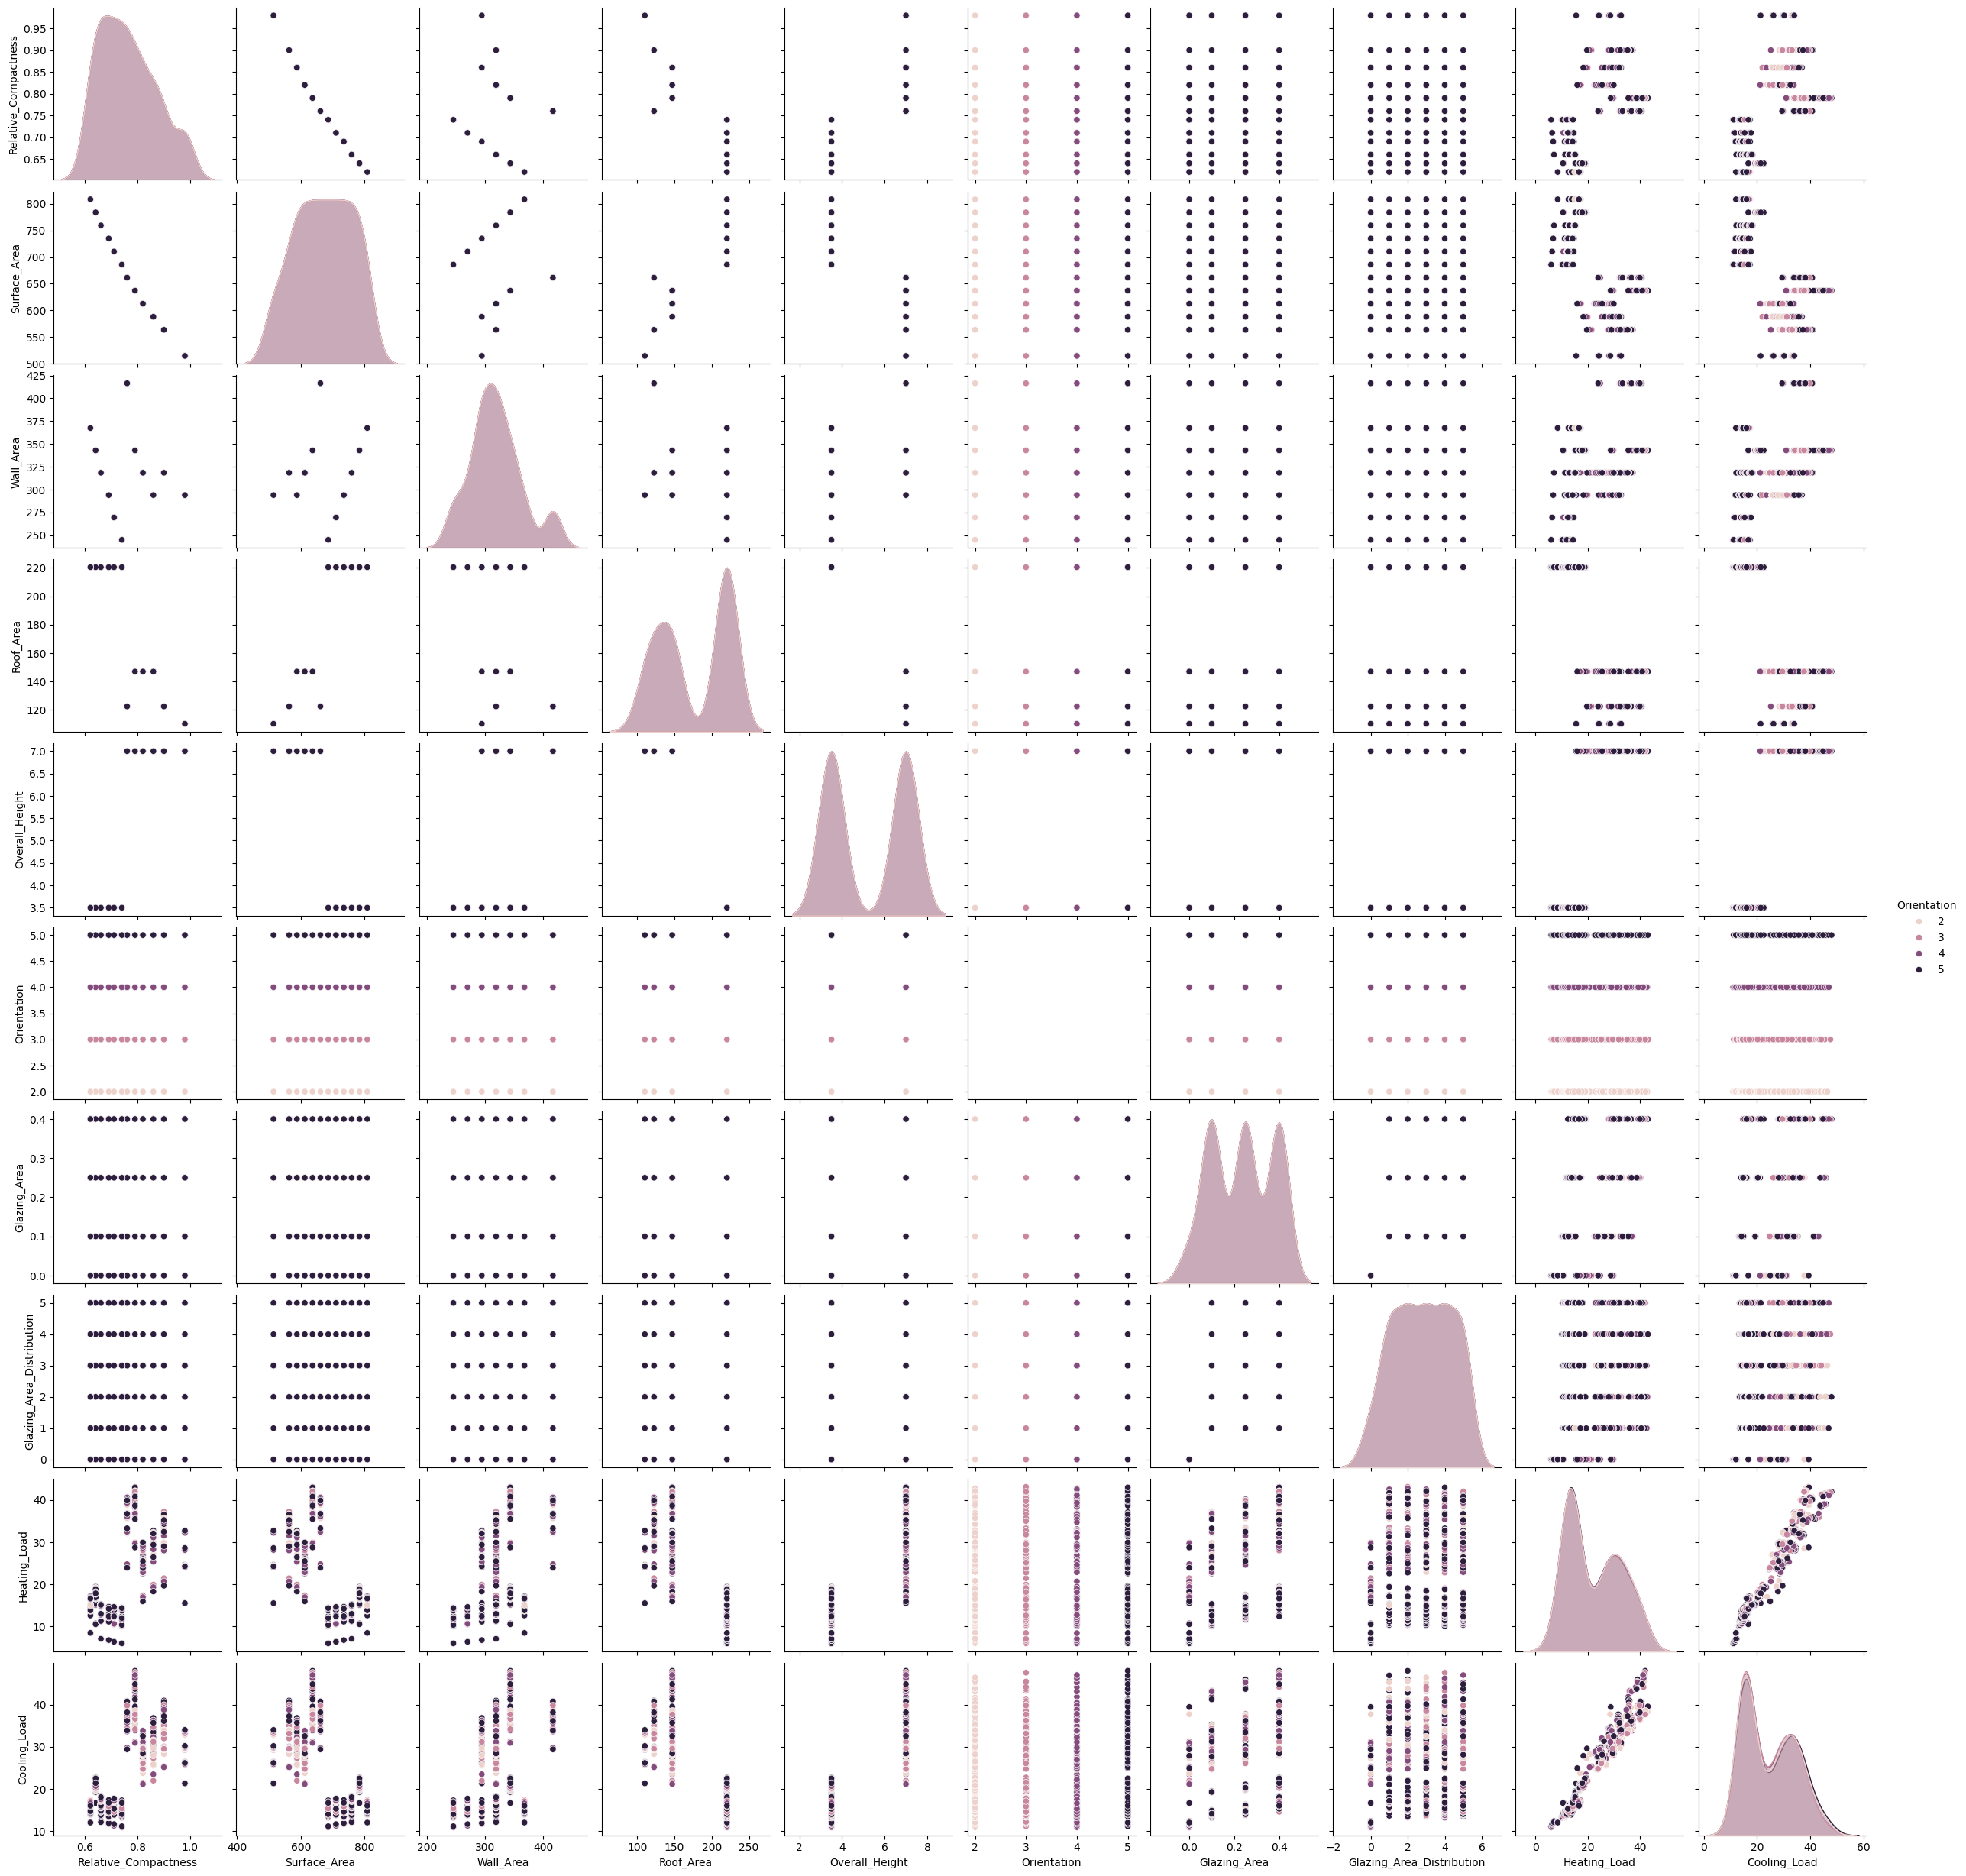

In [77]:
# Show pairwise relationships between the variables
vars = [col for col in df_renamed.columns]
print(vars)
sns.pairplot(df_renamed,
             vars = vars,
             hue = 'Orientation'
             )

plt.show()

Findings:
1. Adding Heating Load and Cooling Load to the pairplots reveals that the relationship between the target variables (y) and the predictors (X) tends to be linear.
2. The data points are more clustered at the lower end of the predictor values. This suggests that, while some variation exists when comparing predictors with each other, certain design choices (or trade-offs) limit extreme values in the dataset.

---

##### Scatterplot

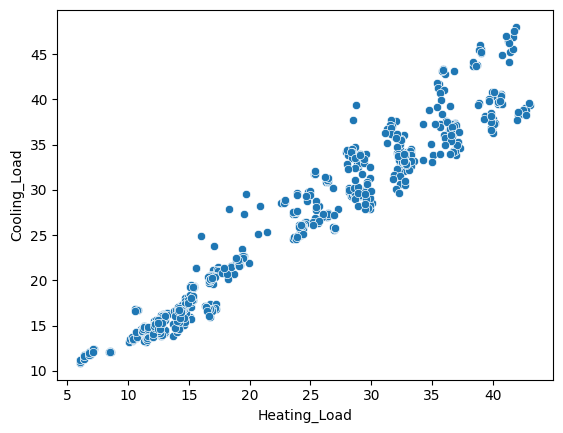

In [78]:
# Show scatterplot to show the relationship between Heating Load and Cooling Load
sns.scatterplot(x = 'Heating_Load', y = 'Cooling_Load',
                data = df_renamed)
plt.show()

Scatterplot shows that the tail extends towards higher values with most data points clustered at the lower values which suggest that there are more buildings in the sample that have low heating/cooling requirements. We can also note here that heating load and cooling load is positively correlated which makes sense because factors, as I've mentioned previously, like compactness, glazing, area, and even insulation, despite it not being part of the features, tend have an effect to both loads.

---

### Key Insights, Findings, and Assumptions:

1. Positive relationship between cooling and heating load (0.98):
    - Cooling and heating load are strongly positively correlated, meaning factors influencing one generally influence the other similarly.
    - Among all features, overall height has the strongest impact on both loads. This makes sense intuitively, as larger vertical volumes require more energy to maintain thermal comfort.

2. Design specifications and additional feature impacts:
    - Overall height as the dominant driver: While features such as glazing area, orientation, and compactness index appear to lean toward energy efficiency, the 0.89–0.90 correlation highlights that height ultimately governs the load. As mentioned in the group summaries, overall height also tends to have a lower variation as compared to the other features. My nuanced take is that load increases with height because larger volumes require more energy to maintain indoor temperatures. However, it is also important to consider the surface-to-volume ratio and material properties (not captured in this dataset), since they also influence energy performance.

    - Feature distribution skewness: Many input features (surface area, glazing area, wall area, etc.) are left-skewed, suggesting that most buildings in the dataset are designed with lower specifications (e.g., smaller surface area, limited glazing). This may reflect cost-saving measures, “efficiency optimization,” or design constraints.

    - Design trade-offs and missing factors: The dataset hints at deliberate trade-offs—compact, cost-efficient designs with lower features—yet the load is still heavily dictated by overall height. However, the absence of data on insulation quality, wall/roof materials, ventilation systems, and HVAC technology limits our ability to fully explain why loads increase disproportionately in some cases. These unmeasured factors likely play a significant role.

3. Recommended next analytical step: Regression modeling
    - A regression analysis would help quantify the exact contribution of each feature to heating and cooling load, validating or challenging the current hypothesis of height being the main driver.

    - This will also test whether secondary features (e.g., surface area, glazing, compactness) contribute meaningfully once height is controlled.

    - Including interaction terms or exploring non-linear relationships could reveal subtler dynamics not obvious in the correlations.

Overall, this exploration suggests that building loads are shaped by a mix of explicit design features (e.g., height, compactness) and likely unobserved factors (e.g., materials, HVAC). While correlations provide useful signals, predictive modeling is essential to disentangle these relationships and quantify their true impact. It would also be best complement this dataset with additional real-world building performance features in order to capture the full picture of energy efficiency.

---